<div style="border:solid grey 1px; padding: 20px">
    
# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:     
    - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
    - сообщение: 3 рубля;
    - 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
    - минута разговора: 1 рубль;
    - сообщение: 1 рубль;
    - 1 Гб интернет-трафика: 150 рублей.
    
**Примечание:**
    
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
   
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
    </div>

__Цель исследования__:
- выбрать лучший тариф из предложенных двух: «Смарт», «Ультра».


__Ход исследования__

Данные компании «Мегалайн» — небольшая выборка клиентов (500 пользователей) за 2018 год, получаем из файлов:
- calls.csv;
- internet.csv;
- messages.csv;
- tariffs.csv;
- users.csv.

О качестве данных ничего не известно, поэтому перед проверкой гипотезы проведем обзор данных.

Наше исследование пройдёт в четыре этапа:

- обзор данных;
- предобработка данных;
- исследовательский анализ данных;
- проверка гипотез.

## Изучение данных

Импортируем библиотеки для работы с сетами.

In [1]:
import pandas as pd # для работы с сетом
from matplotlib import pyplot as plt # для построения графиков
import numpy as np # для использования математических функций
from scipy import stats as st # для проверки гипотез

Прочитаем файлы.

In [2]:
calls = pd.read_csv('calls.csv')

In [3]:
internet = pd.read_csv('internet.csv')

In [4]:
messages = pd.read_csv('messages.csv')

In [5]:
tariffs = pd.read_csv('tariffs.csv')

In [6]:
users = pd.read_csv('users.csv')

Изучим отдельно каждый сет, с помощью методов head(), info(), shape(), describe().

### Информация о звонках

In [7]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.shape

(202607, 4)

In [10]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице **calls**:
- 202607 строк;
- 4 столбца;
- 3 типа данных: float64, int64, object.
    
Согласно документации к данным, таблица информация о звонках:
- **_id_** — уникальный номер звонка;
- **_call_date_** — дата звонка;
- **_duration_** — длительность звонка в минутах;
- **_user_id_** — идентификатор пользователя, сделавшего звонок.

В названии колонок несоответствия не обнаружены, пропуски отсутствуют.

По типу данных, в столбце **_call_date_** изменить тип данных на datetime.
    
В столбце **_duration_** минимальное значение равно нулю, это не ошибка, так в таблице обозначается пропущенные звонки.
   

### Информация об интернет-сессиях

In [11]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
internet.shape

(149396, 5)

In [14]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В таблице **internet**:
- 149396 строк;
- 4 столбца;
- 3 типа данных: float64, int64, object.
    
Согласно документации к данным, таблица информация об интернет-сессиях:
- **_id_** — уникальный номер сессии
- **_mb_used_** — объем потраченного за сессию интернет-трафика (в мегабайтах)
- **_session_date_** — дата интернет-сессии
- **_user_id_** — идентификатор пользователя
    
В названии колонок несоответствия не обнаружены, пропуски отсутствуют.

По типу данных, в столбце **_session_date_** изменить тип данных на datetime.

### Информация о сообщениях

In [15]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
messages.shape

(123036, 3)

В таблице **messages**:
- 123036 строк;
- 3 столбца;
- 2 типа данных: int64, object.
    
Согласно документации к данным, таблица информация о сообщениях:
- **_id_** — уникальный номер сообщения
- **_message_date_** — дата сообщения
- **_user_id_** — идентификатор пользователя, отправившего сообщение
    
В названии колонок несоответствия не обнаружены, пропуски отсутствуют.
 
По типу данных, в столбце **_message_date_** изменить тип данных на datetime.

### Информация о тарифах

In [18]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [19]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [20]:
tariffs.shape

(2, 8)

В таблице **tariffs**:
- 2 строки;
- 8 столбцов;
- 2 типа данных: int64, object.
    
Согласно документации к данным, таблица информация о тарифах:
- **_tariff_name_** — название тарифа
- **_rub_monthly_fee_** — ежемесячная абонентская плата в рублях
- **_minutes_included_** — количество минут разговора в месяц, включенных в абонентскую плату
- **_messages_included_** — количество сообщений в месяц, включенных в абонентскую плату
- **_mb_per_month_included_** — объём интернет-трафика, включенного в абонентскую плату (в мегабайтах)
- **_rub_per_minute_** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- **_rub_per_message_** — стоимость отправки сообщения сверх тарифного пакета
- **_rub_per_gb_** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    
В названии колонок и типов данных несоответствия не обнаружены, пропуски отсутствуют.

### Информация о пользователях

In [21]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [23]:
users.shape

(500, 8)

In [24]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В таблице **users**:
- 2 строки;
- 8 столбцов;
- 2 типа данных: int64, object.
    
Согласно документации к данным, таблица информация о пользователях:
- **_user_id_** — уникальный идентификатор пользователя
- **_first_name_** — имя пользователя
- **_last_name_** — фамилия пользователя
- **_age_** — возраст пользователя (годы)
- **_reg_date_** — дата подключения тарифа (день, месяц, год)
- **_churn_date_** — дата прекращения пользования тарифом (если значение пропущено, то тариф еще действовал на момент выгрузки данных)
- **_city_** — город проживания пользователя
- **_tarif_** — название тарифного плана
    
В названии колонок и типов данных несоответствия не обнаружены.
    
Имеются пропуски в столбце **_churn_date_**. В данном столбце содержится информация о времени прекращения пользования тарифом. Получается, что из 500 пользователей лишь 38 прекратили пользоваться тарифами. Заполнять пропуски по данному столбцу не имеет смысла.
 
По типу данных, в столбце **_churn_date_** и  **_reg_date_** изменить тип данных на datetime.

### Вывод

- после первичного изучения данных можно сказать, что данные хорошо подготовлены;
- наличие нулевых значений в сете calls, столбец duration оправдано, поскольку так в таблице обозначаются пропущенные звонки; 
- наличие пустых значений в сете users, столбец churn_date оправдано, поскольку только 7.6% пользователей прекратили пользоваться тарифами;
- в сетах calls, internet, messages и users необходимо привести столбцы с датами в соответствующий тип данных datetime.
 
Для достижения цели, необходимо устранить проблемы в данных:
 
- заменить типы данных;
- определить и удалить дубликаты;
- категоризировать данные;
- провести исследовательский анализ данных.

## Предобработка данных

### Изменение типа данных

Приведем столбцы с датой в правильный формат datetime, в сетах: **_calls_**, **_internet_**, **_messages_** и **_users_**. Для этого напишем цикл.

In [25]:
columns = ['call_date', 'session_date', 'message_date', 'churn_date', 'reg_date']
sets = [calls, internet, messages, users]
for column in columns:
    for item in sets:
        if column in item:         
            item[column] = pd.to_datetime(item[column], format='%Y-%m-%d')

Проверим в каких столбцах установился нужный нам тип данных, создадим цикл.

In [26]:
for item in sets:
    print(*item.select_dtypes('datetime64[ns]').columns, sep=', ')

call_date
session_date
message_date
churn_date, reg_date


Типы данных изменились у необходимых столбцов.

### Проверка на дубликаты

Создадим цикл и проверим по всем сетам на явные дубликаты.

In [27]:
check_for_duplicates = [calls, internet, messages, tariffs, users]
for item in check_for_duplicates:
    print(item.duplicated().sum())

0
0
0
0
0


Явные дубликаты отсутствуют.

Проверим на уникальность следующие столбцы **_city_**, **_tariff_** в сете **_users_**. Для удобства обернем значения в списки, а для столбца **_city_** применим сортировку по возрастанию.

In [28]:
sorted(list(users.city.unique()))

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

In [29]:
list(users.tariff.unique())

['ultra', 'smart']

Дублей и аномальных названий не выявлено.

### Округление звонков

Округлим звонки в столбце **_duration_**, сет **_calls_** до целого числа в большую сторону, согласно правилам компании «Мегалайн», для округления примени метод ceil(). Так как продолжительность звонков будет целочисленной, изменим тип на int.

In [30]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [31]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


### Создание столбца month для сетов: calls, messages, internet

Для создания столбца **_month_** используем метод DatetimeIndex().

In [32]:
to_create_month = [calls, messages, internet]
to_use_columns = ['call_date', 'message_date', 'session_date']
for item in to_create_month:
    for column in to_use_columns:
        if column in item:
            item['month'] = pd.DatetimeIndex(item[column]).month

### Расчет звонков и израсходованных минут разговора по месяцам

Для будущего слияния фреймов, сгруппируем данные и получим количество, продолжительность звонков за месяц для каждого пользователя. Результат запишем в переменную **_calls_for_merge_**.

In [33]:
calls_for_merge = calls.groupby(['user_id', 'month'])\
                  .agg({'id':'count', 'duration':'sum'})\
                  .reset_index()\
                  .rename(columns={'id':'calls_by_month','duration':'duration_calls_by_months'})

In [34]:
calls_for_merge.head()

,user_id,month,calls_by_month,duration_calls_by_months
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


### Расчет количества отправленных сообщений по месяцам

Для будущего слияния фреймов, сгруппируем данные и получим количество отправленных сообщений за месяц для каждого пользователя. Результат запишем в переменную **_messages_for_merge_**.

In [35]:
messages_for_merge = messages.groupby(['user_id', 'month'])\
                  .agg({'id':'count'})\
                  .reset_index()\
                  .rename(columns={'id':'sms_by_month'})

In [36]:
messages_for_merge.head()

,user_id,month,sms_by_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Расчет израсходованного интернет-трафика по месяцам

Для будущего слияния фреймов, сгруппируем данные и получим количество использованного интернет-трафика за месяц для каждого пользователя. Результат запишем в переменную **_internet_for_merge_**.

In [37]:
internet_for_merge = internet.groupby(['user_id', 'month'])\
                  .agg({'mb_used':'sum'})\
                  .reset_index()\
                  .rename(columns={'mb_used':'gb_used'})

Рассчитаем сколько гигабайт в месяц использовали пользователи, результат округлим до целого числа в большую сторону, согласно правилам компании «Мегалайн», для округления примени метод ceil(). Так как количество использованного интернета станет целочисленным, изменим тип на int.

In [38]:
internet_for_merge['gb_used'] = (internet_for_merge['gb_used'] / 1024).apply(np.ceil)

In [39]:
internet_for_merge.head()

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


### Объединение данных

Объединим сгруппированные данные по звонкам, сообщениям, интернету, пользователям и тарифам в один фрейм, с помощью merge(). Объединенные данные запишем в переменную **_df_**.

In [40]:
df = calls_for_merge.merge(messages_for_merge, on=['user_id','month'], how='outer')

In [41]:
df = df.merge(internet_for_merge, on=['user_id','month'], how = 'outer')

In [42]:
df = df.merge(users, on='user_id', how='left')

Для объединения данных с тарифами, во фрейме **_df_** столбец **_tariff_** переименуем в **_tariff_name_**.

In [43]:
df = df.rename(columns={'tariff': 'tariff_name'})

In [44]:
df = df.merge(tariffs, on='tariff_name', how='left')

Проверим, что получилось.

In [45]:
df.head(10)

,user_id,month,calls_by_month,duration_calls_by_months,sms_by_month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,57.0,350.0,73.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,43.0,338.0,58.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,46.0,333.0,70.0,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1001,11,59.0,430.0,NaN,18.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
9,1001,12,63.0,414.0,NaN,14.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   3214 non-null   int64         
 1   month                     3214 non-null   int64         
 2   calls_by_month            3174 non-null   float64       
 3   duration_calls_by_months  3174 non-null   float64       
 4   sms_by_month              2717 non-null   float64       
 5   gb_used                   3203 non-null   float64       
 6   age                       3214 non-null   int64         
 7   churn_date                187 non-null    datetime64[ns]
 8   city                      3214 non-null   object        
 9   first_name                3214 non-null   object        
 10  last_name                 3214 non-null   object        
 11  reg_date                  3214 non-null   datetime64[ns]
 12  tariff_name         

В связи с группировкой данных появились пропуски в объединенных данных. 

In [47]:
df.isna().sum()

user_id                        0
month                          0
calls_by_month                40
duration_calls_by_months      40
sms_by_month                 497
gb_used                       11
age                            0
churn_date                  3027
city                           0
first_name                     0
last_name                      0
reg_date                       0
tariff_name                    0
messages_included              0
mb_per_month_included          0
minutes_included               0
rub_monthly_fee                0
rub_per_gb                     0
rub_per_message                0
rub_per_minute                 0
dtype: int64

Данные в столбцах **_calls_by_month_**, **_duration_calls_by_months_**, **_sms_by_month_**, **_gb_used_** заполним нулями, т.к. очевидно, что некоторые пользователи не использовали звонки, сообщения или интернет в определенные месяцы. Пропуски в столбце **_churn_date_** оставляем, т.к. пользователи продолжают пользоваться тарифными услугами.
Для заполнения пропусков нулями напишем цикл.

In [48]:
columns_to_edit = ['calls_by_month', 'duration_calls_by_months', 'sms_by_month', 'gb_used']
for column in columns_to_edit:
    df[column] = df[column].fillna(0)

Проверим исправления.

In [49]:
df.isna().sum()

user_id                        0
month                          0
calls_by_month                 0
duration_calls_by_months       0
sms_by_month                   0
gb_used                        0
age                            0
churn_date                  3027
city                           0
first_name                     0
last_name                      0
reg_date                       0
tariff_name                    0
messages_included              0
mb_per_month_included          0
minutes_included               0
rub_monthly_fee                0
rub_per_gb                     0
rub_per_message                0
rub_per_minute                 0
dtype: int64

Пропуски заполнены, кроме столбца **_churn_date_**.

Проверим повторно на дубли.

In [50]:
print(df.duplicated().sum())

0


Дублей нет.

У столбцов **_calls_by_month_**, **_duration_calls_by_months_**, **_sms_by_month_**, **_gb_used_** изменим тип данных на целочисленный с помощью цикла, т.к. нет дробных значений.

In [51]:
for column in columns_to_edit:
    df[column] = df[column].astype('int')

Проверим.

In [52]:
df_columns = list(df.dtypes[df.dtypes == int].index)
for column in columns_to_edit:
    if column in df_columns:
        print(column)

calls_by_month
duration_calls_by_months
sms_by_month
gb_used


### Расчет помесячной выручки с каждого пользователя

Для расчета помесячной выручки с каждого пользователя, необходимо сделать следующее:
- вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
- остаток умножить на значение из тарифного плана; 
- прибавить абонентскую плату, соответствующую тарифному плану.

Для расчета создадим функцию **_calculation_monthly_revenue_**.

In [53]:
def calculation_monthly_revenue(row):
    calls = (row['duration_calls_by_months'] - row['minutes_included']) * row['rub_per_message']
    sms = (row['sms_by_month'] - row['messages_included']) * row['rub_per_message']
    gb = np.ceil(row['gb_used'] - (row['mb_per_month_included'] / 1024)) * row['rub_per_gb']
    total = 0
    for item in [calls, sms, gb, row['rub_monthly_fee']]:
        if item > 0:
            total += item
    return total

Создадим новый столбец **_monthly_revenue_**, с помощью метода apply() запишем в новый столбец значения, возвращаемые функцией. В столбце будут целочисленные данные, поэтому сразу изменим тип на int.

In [54]:
df['monthly_revenue'] = df.apply(calculation_monthly_revenue, axis=1).astype('int')

Для дополнительного анализа создадим столбец с переплатами **_overpayments_**.

In [55]:
df['overpayments'] = df['monthly_revenue'] - df['rub_monthly_fee']

Проверим, что получилось.

In [56]:
df.head(10)

,user_id,month,calls_by_month,duration_calls_by_months,sms_by_month,gb_used,age,churn_date,city,first_name,...,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue,overpayments
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
5,1000,10,57,350,73,15,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
6,1000,11,43,338,58,15,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
7,1000,12,46,333,70,10,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950,0
8,1001,11,59,430,0,18,41,NaT,Москва,Иван,...,smart,50,15360,500,550,200,3,3,1150,600
9,1001,12,63,414,0,14,41,NaT,Москва,Иван,...,smart,50,15360,500,550,200,3,3,550,0


### Вывод

- произведена проверка на дубликаты;
- изменены типы данных по столбцам с датами: call_date, session_date, message_date, churn_date, reg_date;
- согласно требованиям компании «Мегалайн», длительность звонков округлена в большую сторону, если длительность была от 1 секунды и больше;
- согласно требованиям компании «Мегалайн», интернет-трафик округлен в большую сторону и переведен в гигабайты;
- рассчитано продолжительность и количество звонков, смс, интернет-трафика за каждый месяц;
- создана таблица с объединенными данными по пользователям, звонкам, смс, интернет-трафиком, тарифами;
- рассчитана выручка с каждого пользователя помесячно.

## Анализ данных

### Boxplot для первоначального анализа

Проанализируем, сколько минут, смс-сообщений, интернет-трафика, нужно пользователю в месяц. Дополнительно проанализируем доход с пользователей и количество звонков.
Для начала создадим функцию **_box_plotting_**, которая построит графики boxplot по тарифам Смарт и Ультра.

In [57]:
def box_plotting(cols, title_ylabel, suptitle):
    
    fig = plt.figure(figsize=(25, 35))

    for i, col in enumerate(cols):
        if col in cols:
            ax = plt.subplot(3, 3, i+1)
            df.boxplot(column=col, by='tariff_name', fontsize=20,
                            ax=ax, notch=True, boxprops=dict(linestyle='-', linewidth=3),
                                         medianprops=dict(linestyle='-', linewidth=3),
                                         whiskerprops=dict(linestyle='-', linewidth=3),
                                         capprops=dict(linestyle='-', linewidth=3))
                                          
            ax.set_title(col)
            ax.title.set_size(18)
            ax.set_xlabel('')
            ax.set_ylabel(title_ylabel[i], fontsize=20)
            plt.suptitle(suptitle, y=0.93, fontsize=30, fontweight='bold')
            
    plt.show()

In [58]:
cols = ['duration_calls_by_months', 'sms_by_month', 'gb_used', 'monthly_revenue', 'calls_by_month']
title_ylabel = ['Минут в месяц', 'Смс в месяц', 'Интренет-трафика в месяц', 'Доход за месяц', 'Количестов звонков в месяц']
suptitle = 'Сравнение тарифов Смарт и Ультра'

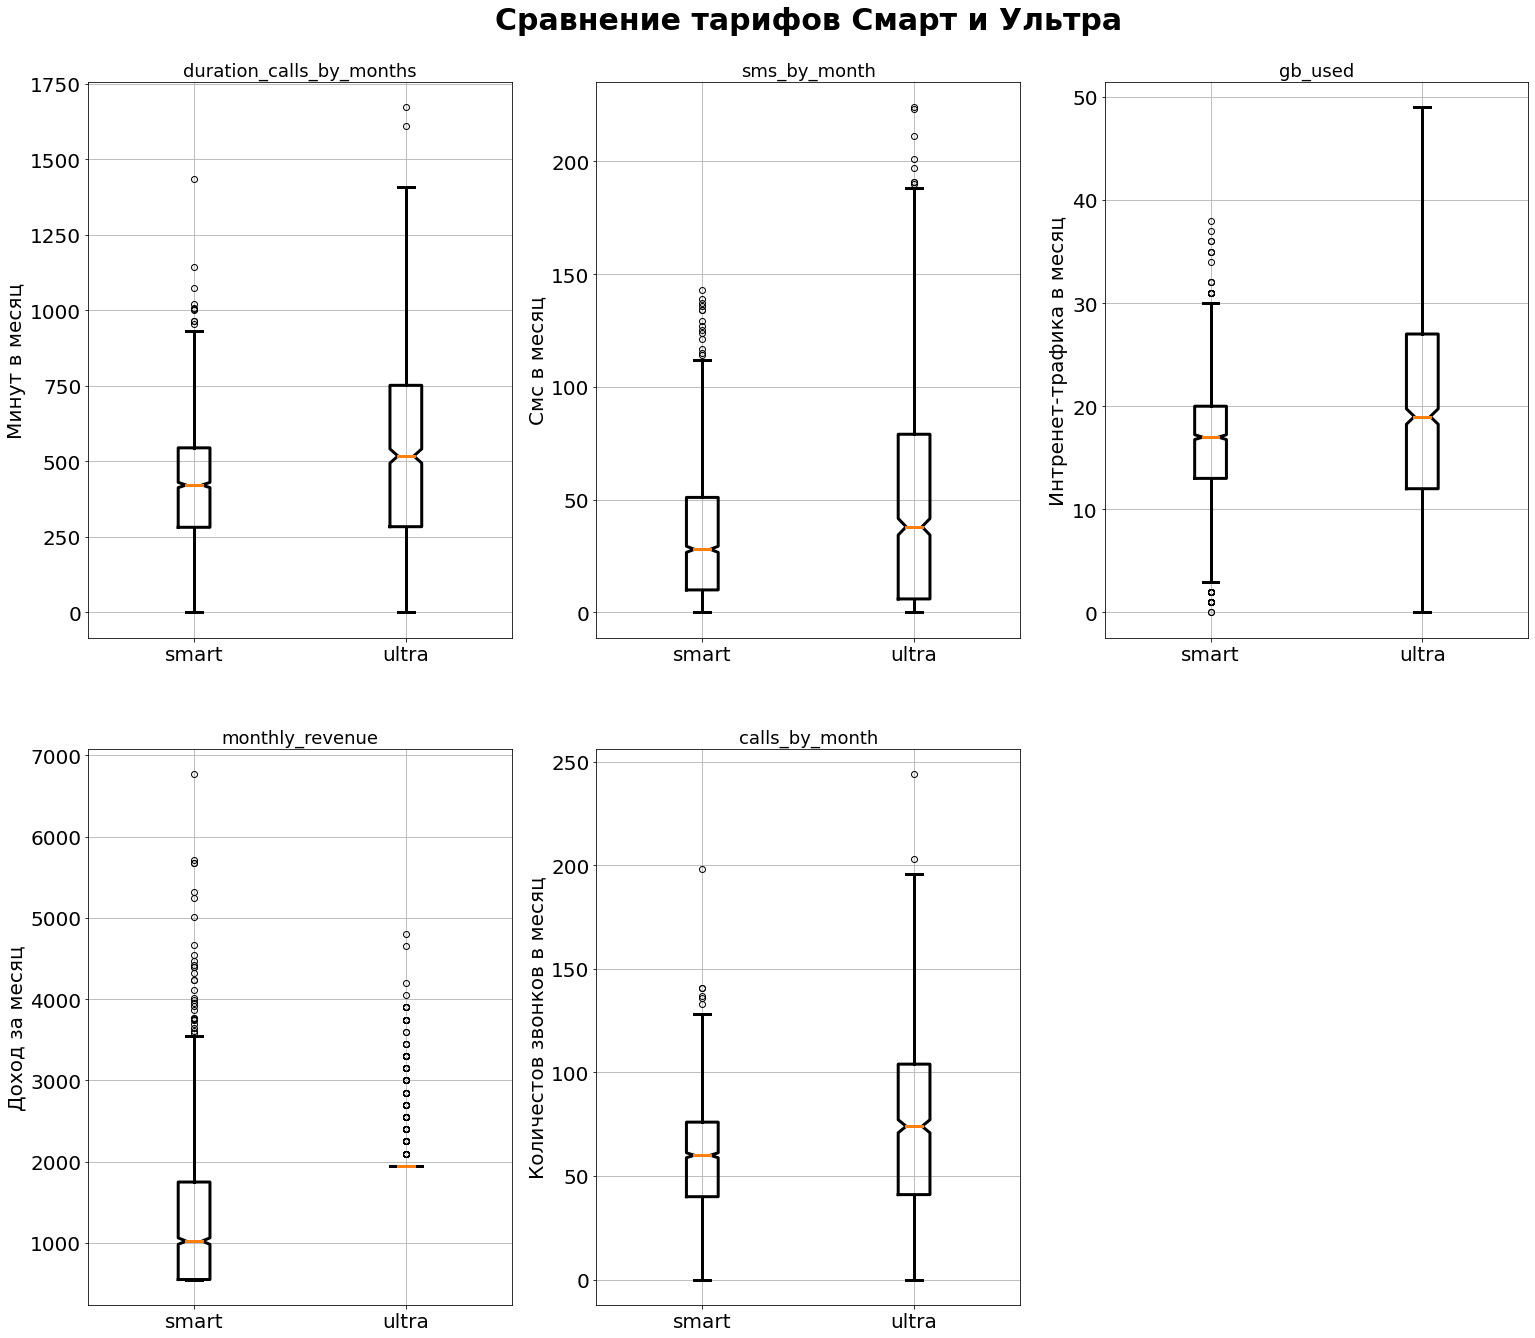

In [59]:
box_plotting(cols, title_ylabel, suptitle)

Продолжительность звонков по тарифу Смарт меньше, чем по тарифу Ультра. Максимальная продолжительность по тарифу Смарт около 900 минут или 15 часов, по тарифу Ультра около 1400 минут или чуть больше 23 часа. Исходя из описания тарифов, большей части пользователей на тарифе Смарт не хватает стандартного количества - 500 минут(8 часов). А у пользователей с тарифом Ультра в конце месяца еще остается больше половины стандартного набора минут. Если отталкиваться от медианы, то у пользователей на тарифе Смарт к концу месяца остается небольшое количество минут, около 78 минут, из стандартного пакета, а у пользователей с тарифом Ультра остается в разы больше неиспользованного времени, более 29 часов. Минимальные значения одинаковые. Если отбросить выбросы, то значения по тарифу Смарт достаточно равномерно распределены.
 
Количество смс отправленных на тарифе Ультра, максимальное 180, превышает максимальное значение на тарифе Смарт 115. Максимальное значение по тарифу Смарт не соответствует стандартному количеству бесплатных минут по тарифу 50, а вот значение в 3 квартиля близко к нему. Пользователи по тарифу Ультра не использует в полной мере смс-сообщения, разница между максимальным значением и стандартным набором бесплатных смс составляет 820 смс. Оба графика скошены вправо. Минимальные значения одинаковые. 
 
По потреблению интернет-трафика, максимальное значение тарифа Ультра 48 Гб превосходит значение тарифа Смарт 30 Гб. Если отбросить выбросы, то на тарифе Смарт минимальным значением является 3 Гб, а на таифе Ультра 0 Гб. Исходя из тарифных планов, у пользователей с максимальными значениями замечен перерасход интернет-трафика. На тарифе Смарт перерасход по максимальному значению (без выбросов) на 15 Гб, на тарифе Ультра на 18 Гб. Даже медианное значение по тарифу Смарт превосходит стандартного объема в 15 Гб. У пользователей с тарифом Ультра медианные значения ниже стандартного объема на 12 Гб, а пользователи входящие в третий квартиль не превышают стандартного объема в 30 Гб.
 
На основании графика боксплот можно сделать небольшой вывод, что пользователи активно пользуются интернетом. Количество бесплатных минут на тарифе Смарт не достаточно пользователям. Количество бесплатных минут на тарифе Ультра достаточно для общения. Количество использованных смс-сообщений на тарифе Смарт достаточно большинству пользователям, а количество на тарифе Ультра более чем достаточно.

По доходам за месяц, пользователям с тарифом Смарт не хватает предоплаченных услуг, видны переплаты. А пользователям на тарифе Ультра хватает предоплаченных услуг, но имеются выбросы. 

Можно предположить, что выручка от пользователей с тарифом Смарт больше чем от пользователей с тарифом Ультра, т.к. первые переплачивают.

На тарифе Ультра пользователи звонят чаще (максимум 180 звонков), чем на тарифе Смарт около 130 звонков.

Проверим, что месячная выручка от пользователей с тарифом Смарт больше чем от пользователей с тарифом Ультра.
Создадим две переменные **_smart_**, **_ultra_**, куда внесем выручку по месяцам каждого тарифа.

In [60]:
smart = df[df['tariff_name'] == 'smart'] \
.pivot_table(index=['month'], values='monthly_revenue', aggfunc='sum').reset_index()

In [61]:
ultra = df[df['tariff_name'] == 'ultra'] \
.pivot_table(index=['month'], values='monthly_revenue', aggfunc='sum').reset_index()

Объединим данные в переменную **_smart_**.

In [62]:
smart = smart.merge(ultra, on='month')

В столбце с выручкой по тарифу Ультра прибавим выручку по тарифу Смарт.

In [63]:
smart['monthly_revenue_y'] = smart.monthly_revenue_x + smart.monthly_revenue_y

Добавим новый столбец, который рассчитает процент от общей выручки по тарифу Смарт, значения округлим до сотых.

In [64]:
smart['%'] = round((smart.monthly_revenue_x / smart.monthly_revenue_y) * 100, 2)

Переименуем столбцы.

In [65]:
smart.columns = ['month', 'smart_monthly_revenue', 'total_monthly_revenue', '%']

In [66]:
smart

,month,smart_monthly_revenue,total_monthly_revenue,%
0,1,24525,42075,58.29
1,2,48001,95401,50.31
2,3,89676,164226,54.61
3,4,107866,217966,49.49
4,5,168849,306849,55.03
5,6,197459,368759,53.55
6,7,246014,438764,56.07
7,8,310340,533240,58.20
8,9,324986,557786,58.26
9,10,401267,655367,61.23


За исключением апреля, выручка действительно была больше от пользователей с тарифом Смарт.

Подготовим срезы данных для будущих графиков в общем выводе.

Срез по тарифам.

In [67]:
users_by_tariff = df.pivot_table(index='tariff_name', values='user_id', aggfunc=lambda x: len(x.unique()))

Срез по доходом от тарифов.

In [68]:
revenue_by_tariff = df.pivot_table(index='tariff_name', values='monthly_revenue', aggfunc='sum')

Срез по переплатам по тарифам.

In [69]:
overpayments = df.pivot_table(index='tariff_name', values='overpayments', aggfunc='sum')

Срез по пользователям, коорые переплачивают.

In [70]:
overpaymented_users = df[df['overpayments'] > 0] \
.pivot_table(index='tariff_name', values='user_id', aggfunc=lambda x: len(x.unique()))

Срез по переплатам за услуги по тарифу Смарт.

In [71]:
call = df[(df['tariff_name'] == 'smart') & (df['duration_calls_by_months'] > 550)]['overpayments'].sum()
sms = df[(df['tariff_name'] == 'smart') & (df['sms_by_month'] > 50)]['overpayments'].sum()
gb = df[(df['tariff_name'] == 'smart') & (df['gb_used'] > 15)]['overpayments'].sum()
overpayments_smart = pd.DataFrame({'type_of_overpayment': ['calls', 'sms', 'gb'], 'count': [call, sms, gb]})
overpayments_smart.set_index('type_of_overpayment',inplace=True)

Срез по переплатам за интернет-трафик по двум тарифам.

In [72]:
overpayments_by_gb = df[((df['tariff_name'] == 'smart') &
                         (df['gb_used'] > 15)) |
                        ((df['tariff_name'] == 'ultra') &
                         (df['gb_used'] > 30))] \
.pivot_table(index='tariff_name', values='overpayments', aggfunc='sum')

Создадим функцию **_pie_plotting_**, которая по вышеуказанным срезам будет строить круговые графики.

In [73]:
def pie_plotting(cols_pie, titles_pie, columns, explode):
    
    fig = plt.figure()

    cols_pie.plot(kind='pie', y=columns, title=titles_pie, 
    autopct = lambda p: '{:.2f}%\n ({:,.0f})'.format(p, p * cols_pie[columns].sum() / 100),
    fontsize=14, figsize=(6, 6),
    shadow=True, startangle=40, 
    colors = ['#43B3DC', '#BBF73E', '#FF4040'],
    explode=explode,
    legend=False)
    
    plt.show()

### Нахождение и исключение выбросов.

Создадим функцию **_remove_outliers_**, которая уберет выбросы по столбцам **_duration_calls_by_months_**, **_sms_by_month_**, **_gb_used_**, **_monthly_revenue_**, **_calls_by_month_**. 

In [74]:
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df[col] = df[((df[col] >= (q1 - 1.5 * iqr)) & (df[col] <= (q3 + 1.5 * iqr)))][col]

In [75]:
cols = ['duration_calls_by_months', 'sms_by_month', 'gb_used', 'monthly_revenue', 'calls_by_month']

Применим функцию.

In [76]:
remove_outliers(df, cols)

### Вычисление среднего, дисперсии и стандартного отклонения

Вычислим среднее, дисперсию и стандартное отклонения для столбцов **_duration_calls_by_months_**, **_sms_by_month_**, **_gb_used_**, **_monthly_revenue_**, **_calls_by_month_**. Для этого напишем функцию **_central_trend_measures_** для вычисления всех мер.

In [77]:
def central_trend_measures(cols):
    for col in cols:
        result = round(df.pivot_table(index='tariff_name', values=col, aggfunc=['median','mean','var','std']), 2)
        result.columns = ['median', 'mean', 'var', 'std']
        print(col)
        display(result)
        print()
        print()

Применим функцию.

In [78]:
central_trend_measures(cols)

duration_calls_by_months


,median,mean,var,std
tariff_name,,,,
smart,421.0,416.86,35371.70,188.07
ultra,495.0,482.76,74842.58,273.57




sms_by_month


,median,mean,var,std
tariff_name,,,,
smart,28.0,33.10,769.78,27.74
ultra,31.0,39.35,1292.67,35.95




gb_used


,median,mean,var,std
tariff_name,,,,
smart,17.0,16.27,31.57,5.62
ultra,18.0,17.99,66.65,8.16




monthly_revenue


,median,mean,var,std
tariff_name,,,,
smart,1009.0,1252.76,547377.75,739.85
ultra,1950.0,2049.23,98739.14,314.23




calls_by_month


,median,mean,var,std
tariff_name,,,,
smart,60.0,58.40,664.43,25.78
ultra,68.0,67.16,1410.80,37.56


У столбцов **_duration_calls_by_months_**, **_gb_used_**, **_calls_by_month_** по двум тарифам значения среднего и медианы значительно близки между собой, что говорит о близком к нормальному распределению данных. Но показатели стандартного отклонения нам говорят, что по тарифу Ультра отклонения от среднего гораздо больше, чем на тарифе Смарт. Соответственно ожидаем, что по тарифу смарт значения менее близки к нормальному распределению. 

In [79]:
df.groupby('tariff_name').agg({'duration_calls_by_months':['mean', 'std', 'var'],
                              'sms_by_month': ['mean', 'std', 'var'],
                              'gb_used': ['mean', 'std', 'var']}).T.astype('int')

tariff_name                    smart  ultra
duration_calls_by_months mean    416    482
                         std     188    273
                         var   35371  74842
sms_by_month             mean     33     39
                         std      27     35
                         var     769   1292
gb_used                  mean     16     17
                         std       5      8
                         var      31     66

### Построение графиков

Создадим функцию **_hist_plotting_**, которая построит гистограммы услуг, а также дохода по тарифам Смарт и Ультра.

In [80]:
def hist_plotting(cols, x_label, bins):
    fig = plt.figure(figsize=(25, 25))

    for i, col in enumerate(cols):
        if col in cols:
            ax = plt.subplot(3, 3, i+1)
            df[df['tariff_name'] == 'smart'].hist(col, bins=bins, ax=ax, color='#43B3DC', ec='black')
            df[df['tariff_name'] == 'ultra'].hist(col, bins=bins, ax=ax, color='#BBF73E', ec='black', alpha=0.7)
            ax.set_title(col)
            ax.title.set_size(18)
            ax.set_xlabel(x_label[i], fontsize=20)
            plt.suptitle(suptitle, y=0.93, fontsize=30, fontweight='bold')
            plt.legend(['Смарт', 'Ультра'], fontsize=14)
plt.show()

In [81]:
x_label = ['Потраченных минут в месяц', 'Потраченных смс в месяц', 'Потраченного трафика в месяц',
           'Доход с пользователей в месяц', 'Количество звонков в месяц']
suptitle = 'Данные по тарифам Смарт и Ультра'

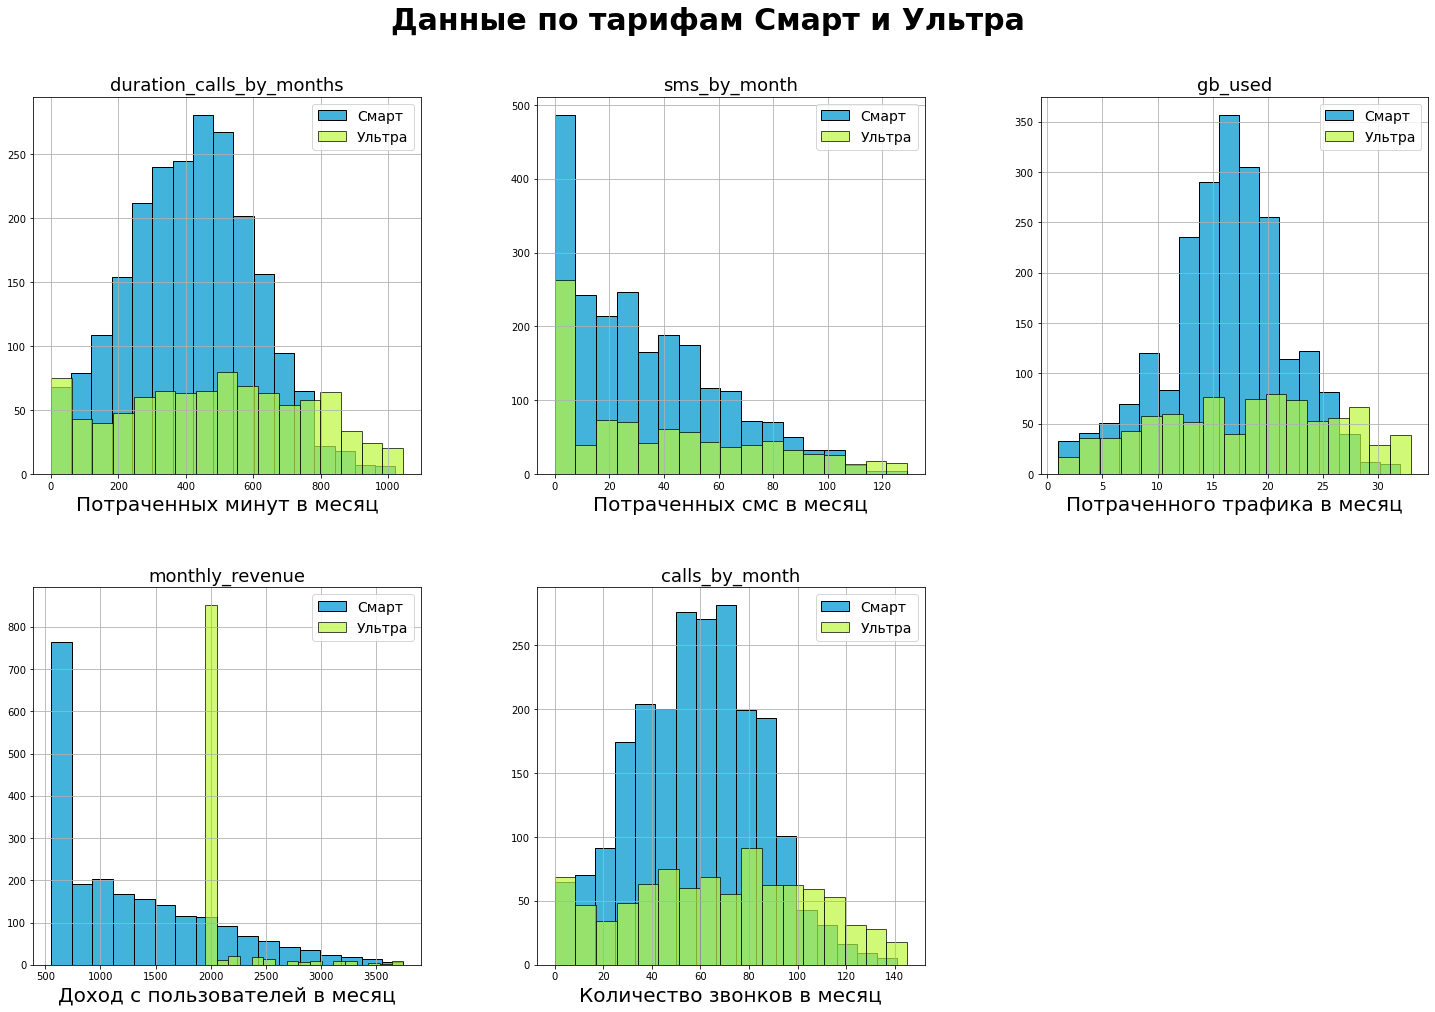

In [82]:
hist_plotting(cols, x_label, 17)

Посмотрим какой процент пользователей не выходят за рамки совего лимита.

In [83]:
print(f"Процент пользователей, которые не выходят за рамки совоего лимита по тарифу Смарт: {round(100 - ((len(df[(df['tariff_name'] == 'smart') & (df['monthly_revenue'] >= 551)]['user_id'].unique())) / (len(df[(df['tariff_name'] == 'smart')]['user_id'].unique()))) * 100, 2)}%.")

Процент пользователей, которые не выходят за рамки совоего лимита по тарифу Смарт: 7.14%.


In [84]:
print(f"Процент пользователей, которые не выходят за рамки совоего лимита по тарифу Ультра: {round(100 - ((len(df[(df['tariff_name'] == 'ultra') & (df['monthly_revenue'] >= 1951)]['user_id'].unique())) / (len(df[(df['tariff_name'] == 'ultra')]['user_id'].unique()))) * 100, 2)}%.")

Процент пользователей, которые не выходят за рамки совоего лимита по тарифу Ультра: 71.62%.


Значения в столбцах **_duration_calls_by_months_**, **_gb_used_**, **_calls_by_month_** по тарифу Смарт, близки к нормальному распределению. Значения по столбцам **_sms_by_month_** и **_monthly_revenue_** скошены влево, имеет отрицательное направление оси. 
 
Пользователи не так часто используют смс-сообщения, об этом свидетельствует неиспользованные(нулевые) смс-сообщения у обоих тарифов. А вот по месячному доходу, можно сказать, что часть пользователей 7.14% на тарифе Смарт стараются не переплачивать и пользуются только предоплаченными услугами. На тарифе Ультра ситуация иная: большинство пользователей 71.62% не переплачивают по тарифу. 

 
Если посмотреть глазами среднестатистического пользователя, то количество предоплаченных минут и смс по тарифам, хватает на месяц без переплат, а вот за интернет придется доплатить. Стоит отметить, что пользователи реже пользуются смс-сообщениями.

Значения в столбцах **_gb_used_** тарифа Ультра, близки к нормальному распределению. Значения по столбцам **_sms_by_month_** и **_monthly_revenue_** скошены влево, имеет отрицательное направление оси. Пользователи не так часто используют смс-сообщения, об этом свидетельствует неиспользованные(нулевые) смс-сообщения. А вот по месячному доходу, можно сказать, что большинство пользователей практически не переплачивают и пользуются только предоплаченными услугами. Количество использованных минут также входит в лимит предоплаченных услуг. По расходу интрнет-трафика, пользователи стараются войти в лимит предоплаченного объема, хотя некоторым это не удаются сделать и приходится доплачивать за сверх лимит от 30 Гб.

И так среднестатистический пользователь не переплачивает за минуты разговора, смс-сообщения, но немного переплачивает за интернет. Также стоит отметить, что пользователи реже пользуются смс-сообщениями.

Найдем процент пользователей, которые переплачивают за интернет-трафик.

In [85]:
print(f"Процент пользователей, которые переплачивают за интернет-трафик по тарифу Смарт: {round(((len(df[(df['tariff_name'] == 'smart') & (df['gb_used'] >= 16)]['user_id'].unique())) / (len(df[(df['tariff_name'] == 'smart')]['user_id'].unique()))) * 100, 2)}%.")

Процент пользователей, которые переплачивают за интернет-трафик по тарифу Смарт: 87.14%.


In [86]:
print(f"Процент пользователей, которые переплачивают за интернет-трафик по тарифу Ультра: {round(((len(df[(df['tariff_name'] == 'ultra') & (df['gb_used'] >= 31)]['user_id'].unique())) / (len(df[(df['tariff_name'] == 'ultra')]['user_id'].unique()))) * 100, 2)}%.")

Процент пользователей, которые переплачивают за интернет-трафик по тарифу Ультра: 20.95%.


Пользователи тарифа Смарт чаще переплачивают за интернет-трафик, чем пользователи тарифа Ультра.

### Вывод

- для компании «Мегалайн», тариф Смарт в месяц приносит больше выручки, чем тариф Ультра. Среднее за месяц составляет 56.62% от общей выручки;
- 92.86% пользователей тарифа Смарт выходят за рамки своего тарифа и переплачивают за услуги;
- в основном для пользователей тарифа Смарт переплата составляет за звонки и использование интернета;
- 28.38% пользователей тарифа Ультра выходят за рамки своего тарифа и переплачивают за услуги;
- в основном для пользователей тарифа Ультра переплата составляет только за использование интернета;
- пользователи обоих тарифов меньше всего используют смс-сообщения;
- среднестатистическому пользователю достаточно предоплаченных минут 417 и смс 33 по тарифу Смарт, но за интернет-трафик 16.27 Гб придется доплатить (сверх лимит 1.27 Гб);
- среднестатистическому пользователю достаточно предоплаченных минут 483 и смс 39 интернет-трафик 17.99 Гб по тарифу Ультра.

## Проверка гипотез

Необходимо проверить две гипотезы: 
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

В обоих случаях нам нужно проверить две независимые между собой выборки, поэтому будем использовать гипотезу о равенстве средних двух генеральных совокупностей. В этом нам поможет t-критерий Стьюдента.

**Сформулируем гипотезы для тарифов Смарт и Ультра**:

- **H0** - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются;
- **H1** - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

В переменную **_smart_revenue_** запишем выручку по тарифу Смарт, в переменную **_ultra_revenue_** запишем выручки по тарифу Ультра. С помощью логической индексации уберем пустые значения, которые образовались при удалении выбросов.

In [87]:
smart_revenue = df.loc[(df['tariff_name'] == 'smart') & (df['monthly_revenue'].notna()), 'monthly_revenue']

In [88]:
ultra_revenue = df.loc[(df['tariff_name'] == 'ultra') & (df['monthly_revenue'].notna()), 'monthly_revenue']

Введем критический уровень статистической значимости 0.05. Если p-value окажется меньше него - отвергаем гипотезу.

In [89]:
alpha = .05

Произведем расчеты с помощью метода scipy.stats.ttest_ind().

In [90]:
results = st.ttest_ind(smart_revenue, ultra_revenue)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.1481243947765852e-198
Отвергаем нулевую гипотезу


Вероятность того, что средняя выручка по тарифу Смарт совпадает со средней выручкой по тарифу Ультра меньше критического уровня статистической значимости 0.05, поэтому нулевую гипотезу отвергаем.

Посчитаем средние выручки по двум тарифам.

In [91]:
print(f"Средняя выручка по тарифу Смарт составляет: {round(smart_revenue.mean(), 2)}.")

Средняя выручка по тарифу Смарт составляет: 1252.76.


In [92]:
print(f"Средняя выручка по тарифу Ультра составляет: {round(ultra_revenue.mean(), 2)}.")

Средняя выручка по тарифу Ультра составляет: 2049.23.


Средние выручки по тарифам Смарт и Ультра различаются. Средняя выручка по тарифу Ультра выше, чем по тарифу Смарт. 

**Сформулируем гипотезы для тарифов Смарт и Ультра**:

- **H0** - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;
- **H1** - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

В переменную **_moscow_revenue_** запишем выручку по Москве, в переменную **other_cities_revenue** запишем выручки по остальным городам. С помощью логической индексации уберем пустые значения, которые образовались при удалении выбросов.

In [93]:
moscow_revenue = df.loc[(df['city'] == 'Москва') & (df['monthly_revenue'].notna()), 'monthly_revenue']

In [94]:
other_cities_revenue = df.loc[(df['city'] != 'Москва') & (df['monthly_revenue'].notna()), 'monthly_revenue']

Введем критический уровень статистической значимости 0.05. Если p-value окажется меньше него - отвергаем гипотезу.

In [95]:
alpha = .05

Произведем расчеты с помощью метода scipy.stats.ttest_ind().

In [96]:
results = st.ttest_ind(moscow_revenue, other_cities_revenue)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.2465723257484849
Не получилось отвергнуть нулевую гипотезу


Вероятность выше 24%. Посмотрим на среднюю выручку по Москве и остальным городам.

In [97]:
print(f"Средняя выручка по Москве составляет: {round(moscow_revenue.mean(), 2)}.")

Средняя выручка по Москве составляет: 1528.26.


In [98]:
print(f"Средняя выручка по остальным городам составляет: {round(other_cities_revenue.mean(), 2)}.")

Средняя выручка по остальным городам составляет: 1489.67.


В Москве, в среднем пользователи платят на 39 рублей больше чем в регионах. Разница не оказалась статистически значимой.
Утверждение верно, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Вывод

- нулевая гипотеза о равенстве средних выручек по тарифам Смарт и Ультра отвергнута;
- средние выручки по тарифам Смарт и Ультра различаются. Средняя выручка по тарифу Ультра 2049.23 выше, чем по тарифу Смарт 1252.76;
- нулевая гипотеза о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов не опровергнута;
- в Москве, в среднем пользователи платят на 39 рублей больше чем в регионах. Разница не оказалась статистически значимой.

## Общий вывод

Перед нами стояла задача - определить лучший тариф.

С точки зрения дохода, лучшим тарифом стал Смарт, так как он приносит более 58% дохода.

<Figure size 432x288 with 0 Axes>

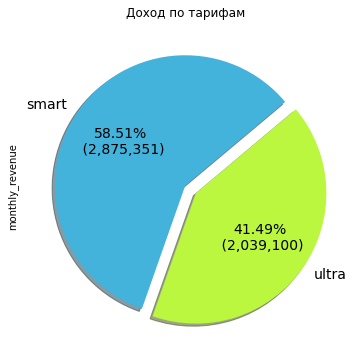

In [99]:
pie_plotting(revenue_by_tariff, 'Доход по тарифам', 'monthly_revenue', [0, 0.1])

Стоит отметить, что тарифом пользуется более 70% пользователей.

<Figure size 432x288 with 0 Axes>

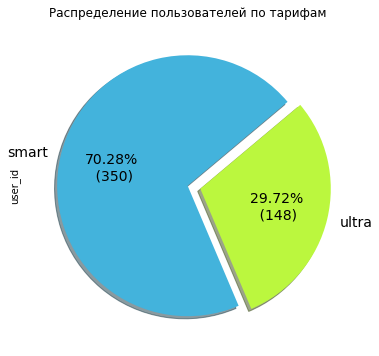

In [100]:
pie_plotting(users_by_tariff, 'Распределение пользователей по тарифам', 'user_id', [0, 0.1])

Тариф Смарт приносит болше дохода из-за переплат пользователей. Более 88% пользователей переплачивают по тарифу. Переплаты за весь исследуемый период (2018 год) составил 1649401 рубль.

<Figure size 432x288 with 0 Axes>

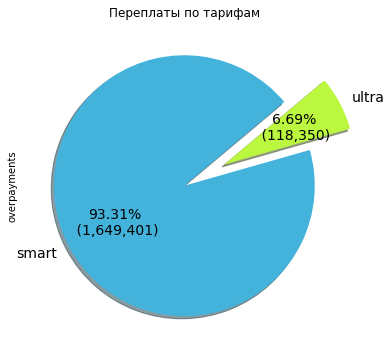

In [101]:
pie_plotting(overpayments, 'Переплаты по тарифам', 'overpayments', [0, 0.35])

<Figure size 432x288 with 0 Axes>

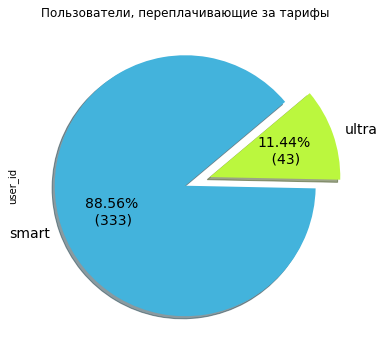

In [102]:
pie_plotting(overpaymented_users, 'Пользователи, переплачивающие за тарифы', 'user_id', [0, 0.2])

Более 56% пользователей переплачивают за интренет-трафик и за минуты разговора, более 24%, меньше всего переплачивают за смс-сообщения, более 18%.

<Figure size 432x288 with 0 Axes>

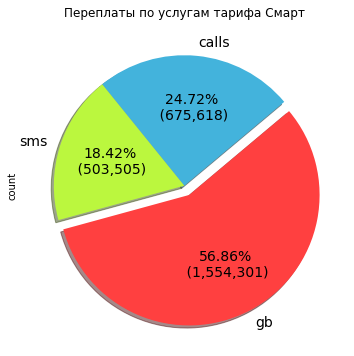

In [103]:
pie_plotting(overpayments_smart, 'Переплаты по услугам тарифа Смарт', 'count', [0, 0, 0.08])

С точки зрения комфортного для пользователей, то лучший - тариф Ультра. Пользователи практически не переплачивают и пользуются только предоплаченными услугами. По расходу интрнет-трафика, пользователи стараются войти в лимит предоплаченного объема, хотя некоторым это не удается сделать и приходится доплачивать за сверх лимит. За 2018 год переплата пользователей тарифа Ультра по интернет-трафику составила 118350 рублей.

<Figure size 432x288 with 0 Axes>

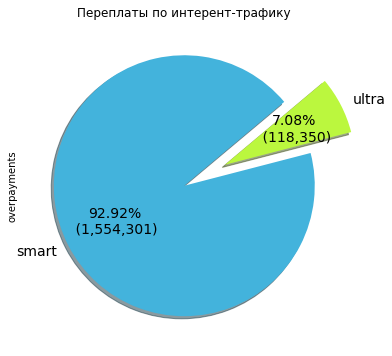

In [104]:
pie_plotting(overpayments_by_gb, 'Переплаты по интерент-трафику', 'overpayments', [0, 0.35])

Среднестатистическому пользователю тарифа Смарт достаточно предоплаченных 417 минут и 33 смс, но за интернет-трафик 16.27 Гб придется доплатить (сверх лимит 1.27 Гб). Среднестатистическому пользователю тарифа Ультра достаточно предоплаченных 483 минут и 39 смс интернет-трафик 17.99 Гб.

Также стоит отметить, что пользователи обоих тарифов редко отправляют смс-сообщения.